In [1]:
#Simulate Superman Punching a victim from Earth's surface to Mars's surface

%matplotlib notebook

from modsim import *

In [2]:
#Step 1/2:Units Being Used

Kg= UNITS.kilogram
N= UNITS.kilogram * UNITS.meter / UNITS.second**2
Km= 1000 * UNITS.meter
degree = UNITS.degree
s = UNITS.second
m = UNITS.meter

In [16]:
#Step 1: Determine Initial Conditions

Mass_Earth= 5.972 * 10**24 * Kg
Mass_Mars= 6.39 * 10**23 * Kg
Mass_Victim= 70 * Kg
Distance_Earth_Victim= 6371 * Km
Force_Punch=  10**30 * N
Distance_Victim_Mars= 225 * 10**6 * Km
T_init = 0
Punch_Time = .125 * s

Punch_Velocity = Force_Punch * Punch_Time / Mass_Victim

accel_g = -((6.674 * 10**11) * Mass_Earth) / (Distance_Earth_Victim **2)

#When adding Drag, include variable in this condition part. Variables equivalent to rho, diameter, C_d are preffered.
condition = Condition(x= 0*m,
                      y= 0*m,
                      g= accel_g,
                      Mass_Earth= 5.972 * 10**24 * Kg,
                      Mass_Mars= 6.39 * 10**23 * Kg,
                      Mass_Victim= 70 * Kg,
                      Distance_Earth_Victim= 6371 * Km,
                      angle= 90 * degree,
                      init_force= Force_Punch,
                      init_a = Force_Punch/Mass_Victim,
                      init_v = Punch_Velocity,
                      duration = 10 *s,
                      )
print(Punch_Velocity)

1.785714285714286e+27 meter / second


In [17]:
#Step 2: Make a System
def make_system(T_init, Distance_Earth_Victim, Distance_Victim_Mars, Force_Punch, Mass_Victim, Mass_Earth, Mass_Mars):
    init = State(DEV=Distance_Earth_Victim)
    
    system = System(init=init,
                    T_init=T_init, 
                    Distance_Earth_Victim=Distance_Earth_Victim,
                    Distance_Victim_Mars=Distance_Victim_Mars,
                    Force_Punch=Force_Punch,
                    Mass_Victim=Mass_Victim,
                    Mass_Earth=Mass_Earth,
                    Mass_Mars=Mass_Mars,
                    )
    return system

#Add variable in make_system equivalent to area for use in determining drag
def make_system(condition):
    unpack(condition)
    
    
    vy = init_v
    init = State( y=y, vy=vy)
    
    ts= linspace(0,duration, 101)
    
    return System(init=init, g=g, Mass_Victim= Mass_Victim, Mass_Earth= Mass_Earth, Mass_Mars= Mass_Mars,ts=ts)
    
    

In [18]:
system = make_system(condition)


In [19]:
#Step 3: Creating a Vector
accel_punch = Force_Punch/condition.Mass_Victim



In [20]:
#Step 4: Defining Gravity
force_g =  -((6.674 * 10**11 * N * m**2 / Kg**2) * condition.Mass_Victim * condition.Mass_Earth) / (condition.Distance_Earth_Victim ** 2)
print(force_g)
accel_g = -((6.674 * 10**11 * N * m**2 / Kg**2 ) * condition.Mass_Earth) / (condition.Distance_Earth_Victim **2)
print(accel_g)
print(accel_punch)


-6.873672422971172e+24 kilogram * meter / second ** 2
-9.81953203281596e+22 meter / second ** 2
1.4285714285714285e+28 meter / second ** 2


In [21]:
#Step 5: Defining the Slope

def slope_func(state, t, system):
    y, vy = state
    unpack(system)
    
    a_grav = accel_g
    
    v =  vy
    
    a = a_grav
    
    return vy, a
    

In [22]:
#Running the Program

system_test= make_system(condition)
slope_test= slope_func(system.init, 0, system)
print(slope_test)
run_odeint(system_test, slope_func)
print(run_odeint) 
ys = system_test.results.y

(<Quantity(1.785714285714286e+27, 'meter / second')>, <Quantity(-9.81953203281596e+22, 'meter / second ** 2')>)
<function run_odeint at 0x0000017A174E4488>


<IPython.core.display.Javascript object>


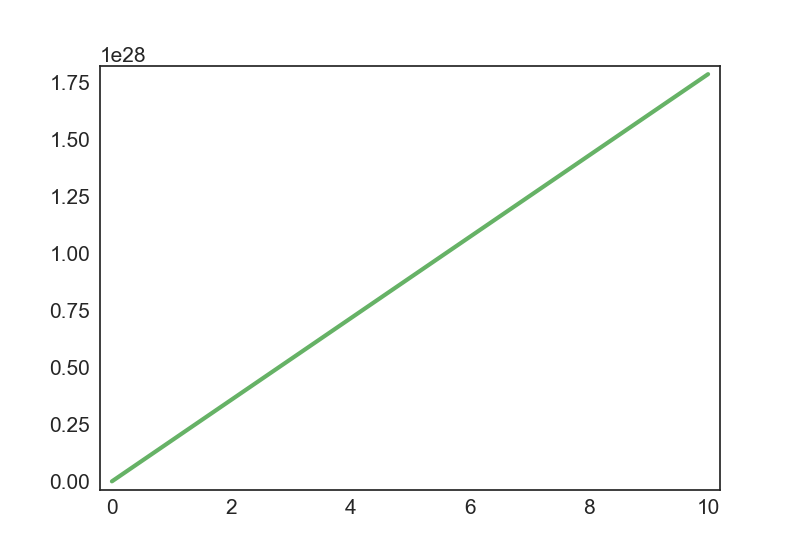

In [23]:
#Displaying the End
newfig()

plot(ys, 'g-', label='y')


(<Quantity(0.0, 'meter / second')>, <Quantity(0.0, 'meter / second')>, <Quantity(0.0, 'kilogram / kilometer ** 2')>, <Quantity(-9.81953203281596e+28, 'kilogram / kilometer ** 2')>)


<function run_odeint at 0x000001B489B62488>


In [17]:
newfig()
plot(system_test.a.x)

<IPython.core.display.Javascript object>


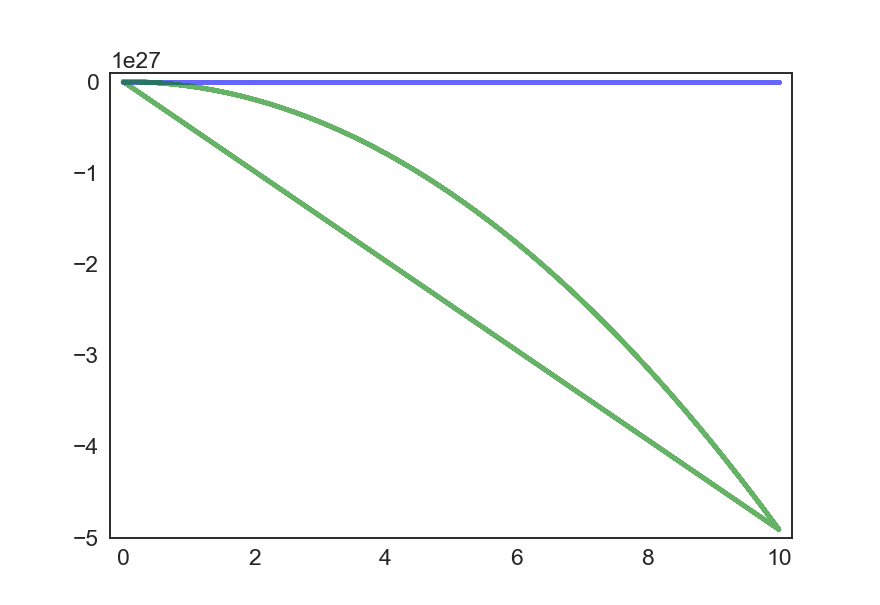

In [19]:
theta2 = np.deg2rad(angle);
punchupx, punchupy = pol2cart(90, up_force);

print(punchupx, punchupy)

[  -40.32662545 -4480.73616129] newton [   80.45969972  8939.96663601] newton


In [53]:
a_grav = Vector(0, accel_g)
a_punch = Vector(0, accel_punch)
    
print(a_grav)

[  0.00000000e+00  -9.81953203e+22] newton / kilogram


<IPython.core.display.Javascript object>


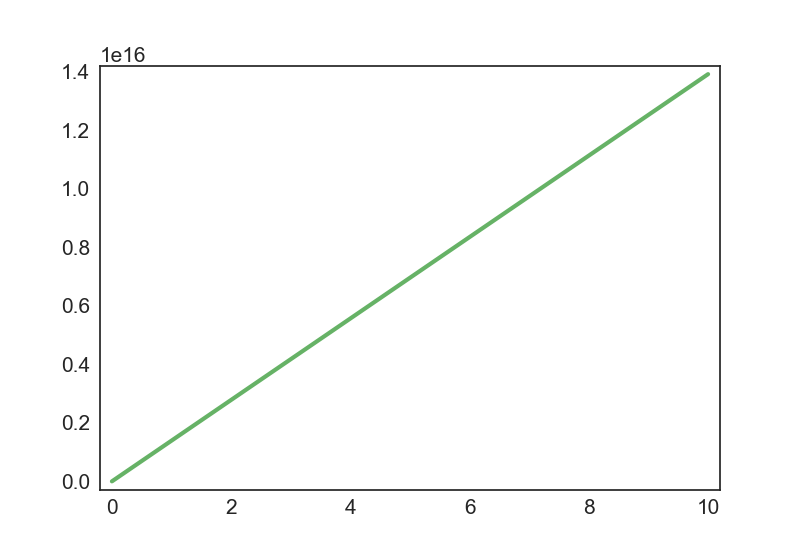

In [41]:
%matplotlib notebook

from modsim import *

#Step 1/2:Units Being Used

Kg= UNITS.kilogram
N= UNITS.kilogram * UNITS.meter / UNITS.second**2
Km= 1000 * UNITS.meter
degree = UNITS.degree
s = UNITS.second
m = UNITS.meter

#Step 1: Determine Initial Conditions

Mass_Earth= 5.972 * 10**24 * Kg
Mass_Mars= 6.39 * 10**23 * Kg
Mass_Victim= 70 * Kg
Distance_Earth_Victim= 6371 * Km
Force_Punch=  1 *10**18 * N
Distance_Victim_Mars= 225 * 10**6 * Km
T_init = 0
Punch_Time = .125 * s

Punch_Velocity = Force_Punch * Punch_Time / Mass_Victim

accel_g = -((6.674 * 10**11) * Mass_Earth) / (Distance_Earth_Victim **2)

#When adding Drag, include variable in this condition part. Variables equivalent to rho, diameter, C_d are preffered.
condition = Condition(x= 0*m,
                      y= 0*m,
                      g= accel_g,
                      Mass_Earth= 5.972 * 10**24 * Kg,
                      Mass_Mars= 6.39 * 10**23 * Kg,
                      Mass_Victim= 70 * Kg,
                      Distance_Earth_Victim= 6371 * Km,
                      angle= 90 * degree,
                      init_force= Force_Punch,
                      init_a = Force_Punch/Mass_Victim,
                      init_v = Punch_Velocity,
                      duration = 10 *s,
                      )

def make_system(condition):
    unpack(condition)
    
    
    vy = init_v
    init = State( y=y, vy=vy)
    
    ts= linspace(0,duration, 101)
    
    return System(init=init, g=g, Mass_Victim= Mass_Victim, Mass_Earth= Mass_Earth, Mass_Mars= Mass_Mars,ts=ts)
    
system = make_system(condition)

#Step 4: Defining Gravity
force_g =  -((6.674 * 10**11 * N * m**2 / Kg**2) * condition.Mass_Victim * condition.Mass_Earth) / (condition.Distance_Earth_Victim ** 2)

accel_g = -((6.674 * 10**11 * N * m**2 / Kg**2 ) * condition.Mass_Earth) / (condition.Distance_Earth_Victim **2)

def slope_func(state, t, system):
    y, vy = state
    unpack(system)
    
    Dis_E_V = condition.Distance_Earth_Victim + y
    
    accel_g = -((6.674 * 10**11 * N * m**2 / Kg**2 ) * condition.Mass_Earth) / (Dis_E_V **2)
    a_grav = accel_g
    
    v =  vy
    
    a = a_grav
    
    return vy, a
    
#Running the Program

system_test= make_system(condition)
slope_test= slope_func(system.init, 0, system)

run_odeint(system_test, slope_func)

ys = system_test.results.y

#Displaying the End
newfig()

plot(ys, 'g-', label='y')